In [2]:
# -*- coding: utf-8 -*-
import torch
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Introducció

Avui començarem a fer feina amb **Pytorch**, ja que la segona part del curs tracta de xarxes neuronals profundes. Aquesta és una biblioteca de programari de codi obert dins l'àmbit d'aprenentatge automàtic, esta escrita en _Python_, _C++_ i _CUDA_, i basada en la biblioteca del programari _Torch_ del llenguatge _LUA_. **PyTorch** va ser desenvolupada inicialment pel departament d'intel·ligència artificial de l'empresa Facebook i l'empresa Uber.

Començarem a conèixer aquesta llibreria mitjançant l'execució d'un exemple. Vosaltres a continuació haureu de resoldre dos petits problemes.

## Exemple de joguina

El problema que volem resoldre és la predicció del valor de la funció sinus per mitjà d'un polinomi de grau 3, es a dir, cercam els coeficients $a$, $b$, $c$ i $d$ de la següent equació: $ y = a + bx + cx^2 + dx^3$ .  Com podem imaginar aquest és un problema de regressió.  Aquest és un problema extremadament senzill i ens permetrà descobrir l'estructura bàsica d'una xarxa emprant **Pytorch**.


## Generació de les dades

Les dades que necessitarem seran els valors d'entrenament, en concret, generarem 2000 mostres que comprendran els valors de $x$, $x^2$ i $x^3$ entre $-\Pi$ i $\Pi$ i els respectius valors de la funció sinus. A més també hem de generar les etiquetes corresponents que, seguint amb les bones pràctiques de l'àrea, anomenarem $y$.


**Nota**

La funció [unsqueeze](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) ens permet afegir una dimensió al nostre tensor. En aquest cas concret ens serveix per passar d'un vector a una matriu i així permetre el càlcul posterior amb l'operació `pow`.


In [11]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)   # Operacions vectorials
# For this example, the output y is a linear function of (x, x^2, x^3), so we can consider it as a linear layer neural network.
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

print("Info per entendre que passa:")
print(x.shape)
print(xx.shape)
print(y.shape)

Info per entendre que passa:
torch.Size([2000])
torch.Size([2000, 3])
torch.Size([2000])


## Definició de la xarxa

El mòdul [torch.nn](https://pytorch.org/docs/stable/nn.html) conté els blocs basics per la construcció de les xarxes. Utilitzarem `nn.Sequential` per definir el nostre model com una seqüència de capes. Aquest és un mòdul que conté altres mòduls i els aplica en seqüència per produir una sortida. El mòdul lineal `nn.Linear` calcula la sortida de l'entrada mitjançant una funció lineal i opera els tensors interns pel seu pes i biaix. La capa ``nn.Flatten`` "aplana" la sortida de la capa lineal a un tensor 1D, perquè coincideixi amb la forma de $y$.

A més de la xarxa també definirem els paràmetres de l'entrenament. En aquest cas:

- Funció de pèrdua: És la funció que volem minimitzar mitjançant l'entrenament. En aquest cas emprarem el `MSE (Mean Squared Error)`.
- Rati d'aprenentatge (_Learning Rate_): Representa la velocitat o el pas amb el qual un model d'aprenentatge automàtic ajusta els pesos i els paràmetres durant el procés d'entrenament.
- Algorisme d'Optimització: Tècnica que s'empra per ajustar els pesos i paràmetres d'un model durant el procés d'entrenament. El seu objectiu principal és minimitzar la funció de pèrdua del model. Els optimitzadors determinen com s‟actualitzen els paràmetres del model en funció de l'error calculat (és dependent de la funció de pèrdua elegida).

In [12]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1))

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate =  1e-6

# Definition of the optimizer: Stochastic Gradient Descent (SGD)
# Rep per paràmetre els paràmetres del model i el
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


## Entrenament

Amb **Pytorch** hem de definir el nostre propi bucle d'entrenament, en el qual haurem de realitzar totes les passes d'una iteració:

1. Predicció
2. Càlcul de la pèrdua
3. Còmput del gradient respecte als paràmetres del model.
4. Actualitzar els pesos del model

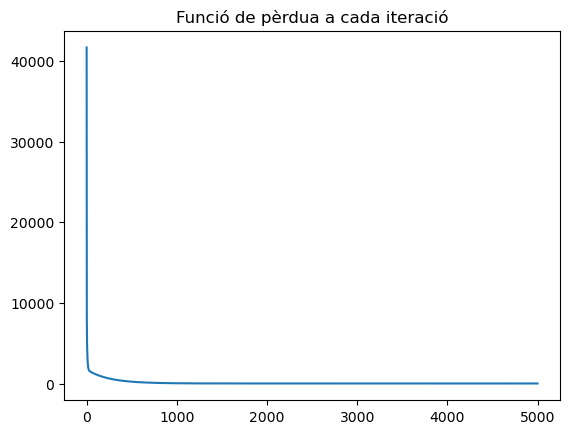

Funció estimada
  y = -3.694622137118131e-05 + 0.8566996455192566 x + 6.373709766194224e-06 x^2 + -0.09332453459501266 x^3


In [13]:
iter = 5000
loss_p = np.zeros(iter)  # guardam la pèrdua de cada iteració

for t in range(iter):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    loss_p[t] = loss.item()
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        #for param in model.parameters():
            #param -= learning_rate * param.grad
        optimizer.step()

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

plt.title("Funció de pèrdua a cada iteració")
plt.plot(loss_p)
plt.show()

# For linear layer, its parameters are stored as `weight` and `bias`.
print("Funció estimada")
print(f'  y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

## Mostram els resultats del nostre aprenentatge

Realitzam la predicció en el rang d'entrenament i dibuixam el resultat (vermell) _versus_ la funció original (verd).


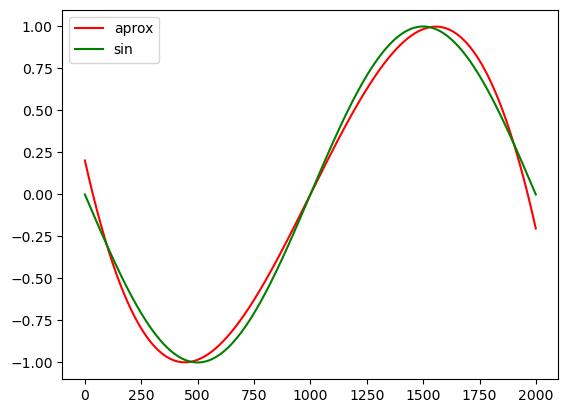

In [14]:
res = np.zeros((2000))

llw = linear_layer.weight[:, :]
for i, v in enumerate(x):

  res[i] = linear_layer.bias.item() + (llw[:, 0].item() * v) + (llw[:, 1].item() * v**2) + (llw[:, 2].item() *  v**3)

plt.title("")
plt.plot(res, color="red", label="aprox")
plt.plot(y, color="green", label="sin")
plt.legend()
plt.show()